# Song popularity dataset
Predicting the popularity of a song

### Importing library's

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## EDA

In [218]:
df = pd.read_csv("../archive/song_data.csv")
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [219]:
df.shape

(18835, 15)

In [220]:
df.drop_duplicates(subset='song_name', keep='first', inplace=True)
df.shape

(13070, 15)

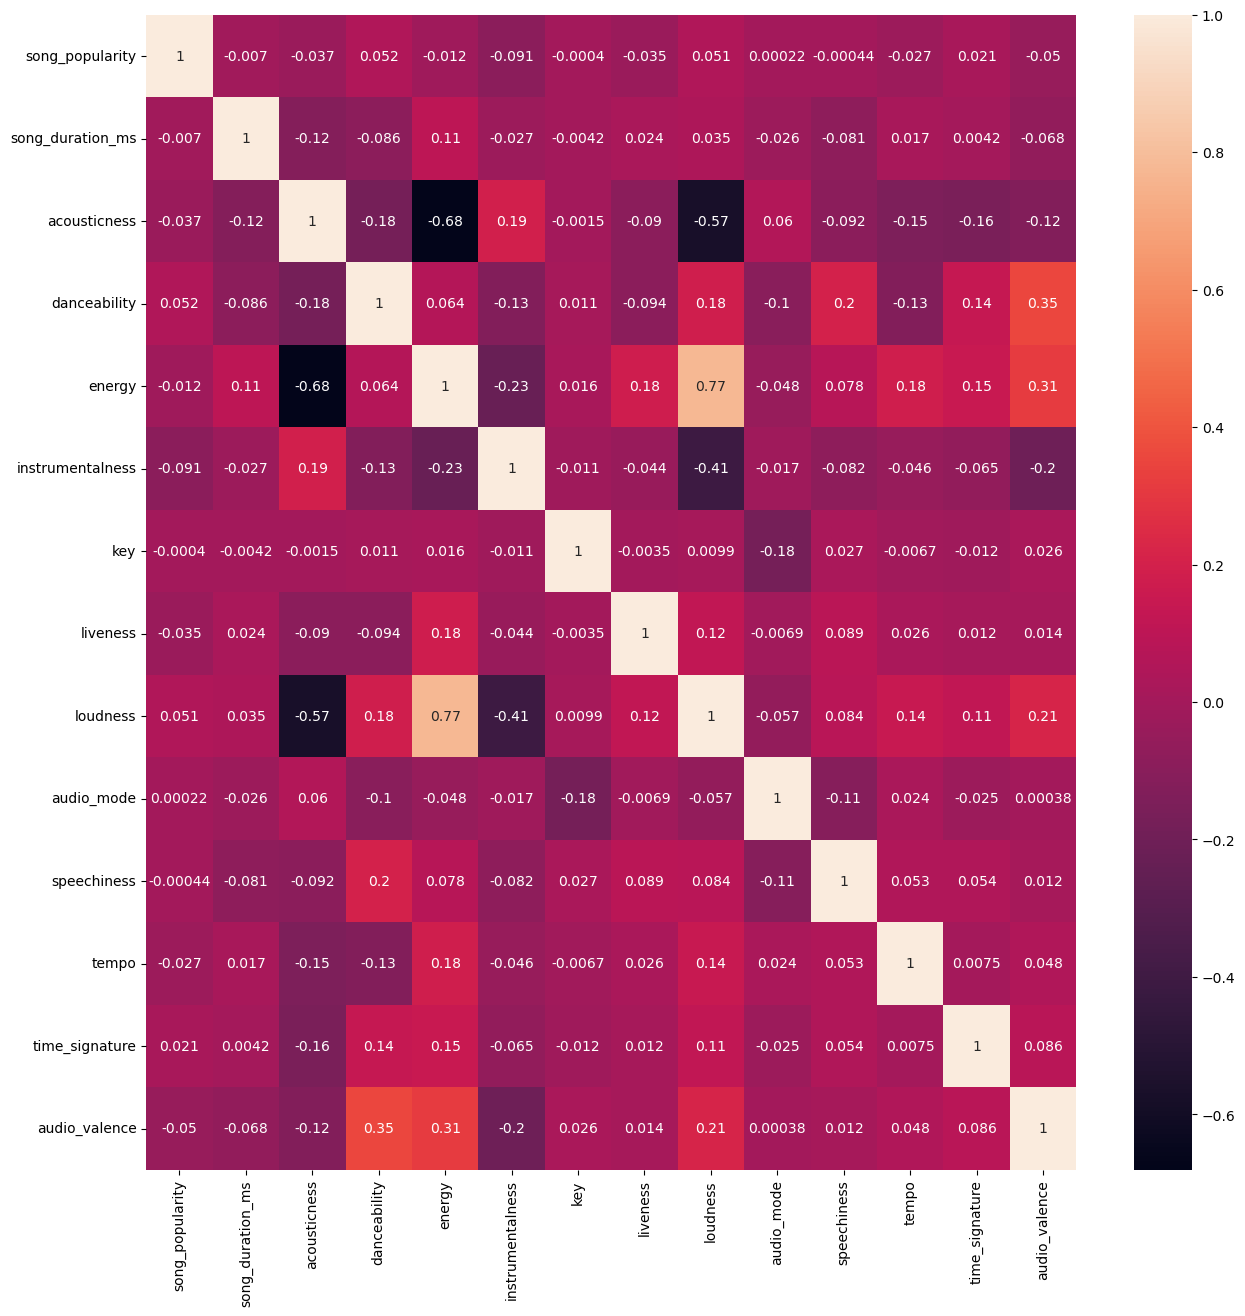

In [221]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot= True,)
plt.show()

In [222]:
df = df.drop(['song_name','loudness'], axis=1);
df.shape

(13070, 13)

<function matplotlib.pyplot.show(close=None, block=None)>

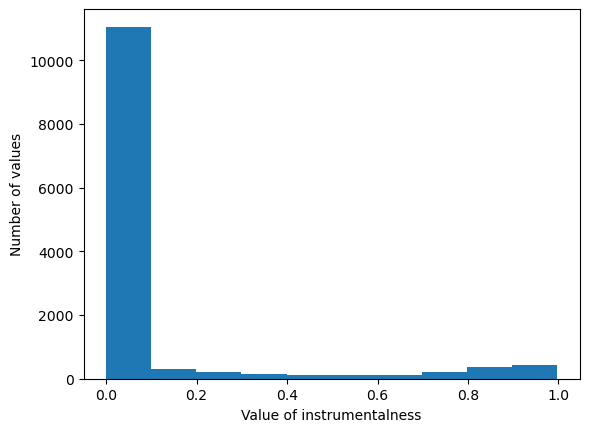

In [223]:
plt.hist(df['instrumentalness'])
plt.xlabel('Value of instrumentalness')
plt.ylabel('Number of values')
plt.show

In [224]:
df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,1,0.0313,172.011,4,0.574


One hot encoding not needed cause all of the features are already numbers

## Divide track_popularity in classes(labels)

<function matplotlib.pyplot.show(close=None, block=None)>

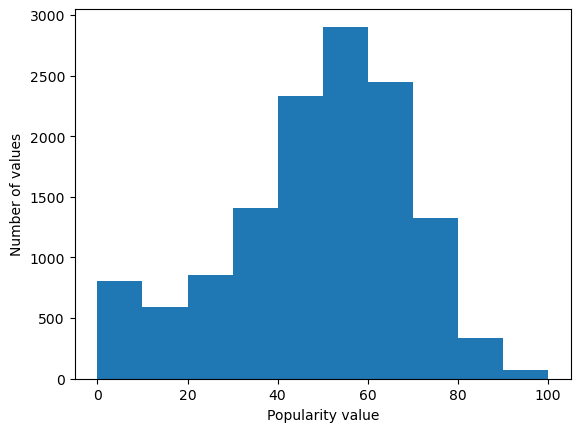

In [225]:
plt.hist(df['song_popularity'])
plt.xlabel('Popularity value')
plt.ylabel('Number of values')
plt.show

## Making the model

In [226]:
# Code non-optional Assignment starts here

features = [x for x in df.columns if x not in ['song_popularity']]
features

# Code non-optional Assignment stops here

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'audio_mode',
 'speechiness',
 'tempo',
 'time_signature',
 'audio_valence']

In [227]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(df[features], df['song_popularity'], train_size = 0.6, random_state = RANDOM_STATE)

In [228]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

min_samples_split_list: a list of integers representing the minimum number of samples required to split an internal node in the decision tree

max_depth_list: a list of integers and None representing the maximum depth of the decision tree.

These lists are used for hyperparameter tuning, where the code iterates over different values of min_samples_split and max_depth to find the combination that results in the best model performance. The goal is to identify the hyperparameters that minimize the Root Mean Squared Error (RMSE) on both the training and validation sets, helping to prevent overfitting and improve the model's generalization ability.

In [229]:
# Code non-optional Assignment starts here

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64] # None means that there is no depth limit.

### Look at min_samples_split_list

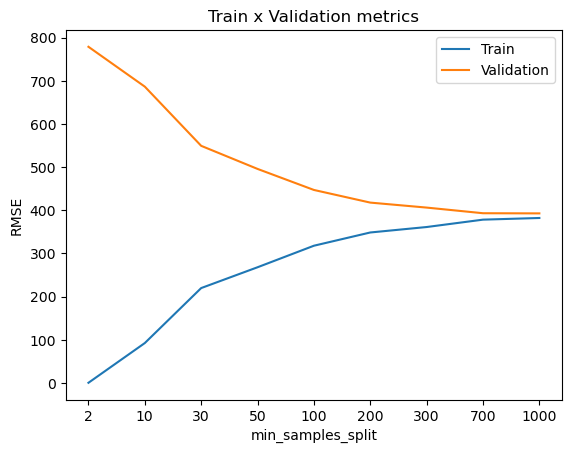

In [230]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
    predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test_scaled) ## The predicted values for the test dataset
    accuracy_train = mean_squared_error(predictions_train,y_train)
    accuracy_val = mean_squared_error(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

### Look at max_depth_list

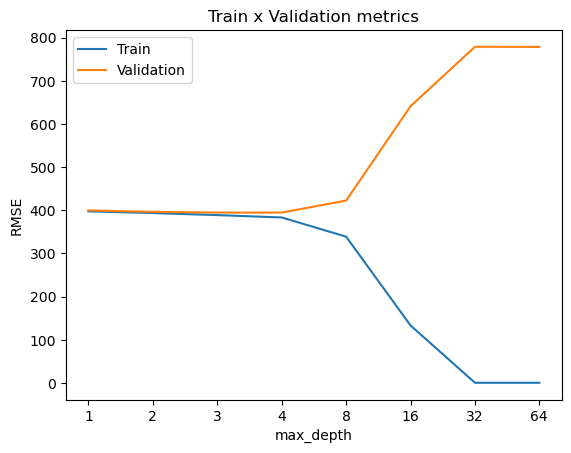

In [231]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeRegressor(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
    predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test_scaled) ## The predicted values for the test dataset
    accuracy_train = mean_squared_error(predictions_train,y_train)
    accuracy_val = mean_squared_error(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# Code non-optional Assignment stops here

## Choose best hyperparameters for decision tree model

In [232]:
decision_tree_model = DecisionTreeRegressor(min_samples_split = 1000,
                                             max_depth = 4,
                                             random_state = RANDOM_STATE).fit(X_train_scaled,y_train)

## RMSE

In [233]:
print(f"Metrics train:\n\tAccuracy score: {np.sqrt(mean_squared_error(decision_tree_model.predict(X_train_scaled),y_train)):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {np.sqrt(mean_squared_error(decision_tree_model.predict(X_test_scaled),y_test)):.4f}")

Metrics train:
	Accuracy score: 19.6379
Metrics validation:
	Accuracy score: 19.8381


### Visualizing the Decision Tree

In [234]:
plt.figure(figsize=(100,100))
plot_tree(decision_tree_model, feature_names=X_train.columns.tolist(), filled=True) # X_train.columns.tolist if scales is away
plt.show()

### Feature Importance

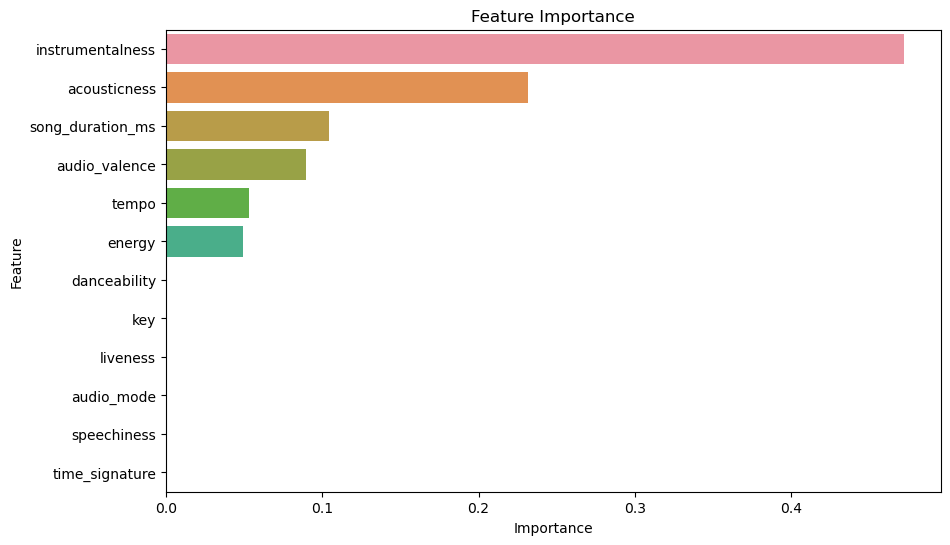

In [235]:
importances = decision_tree_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

## Randomforest

In [236]:
# Code non-optional Assignment starts here

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700, 1000]
max_depth_list = [2, 4, 8, 16, 32, 64]
n_estimators_list = [10,50,100,500]

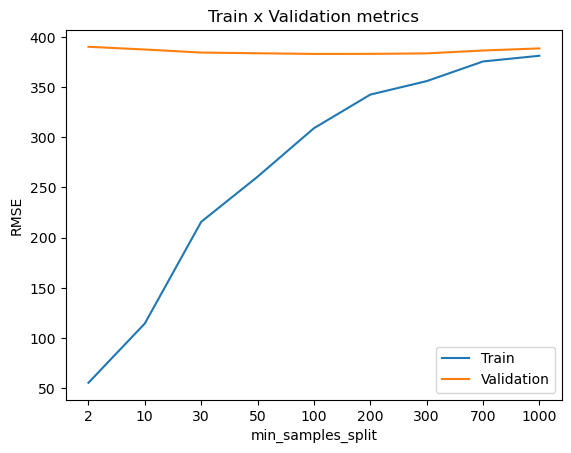

In [237]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestRegressor(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
    predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test_scaled) ## The predicted values for the test dataset
    accuracy_train = mean_squared_error(predictions_train,y_train)
    accuracy_val = mean_squared_error(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

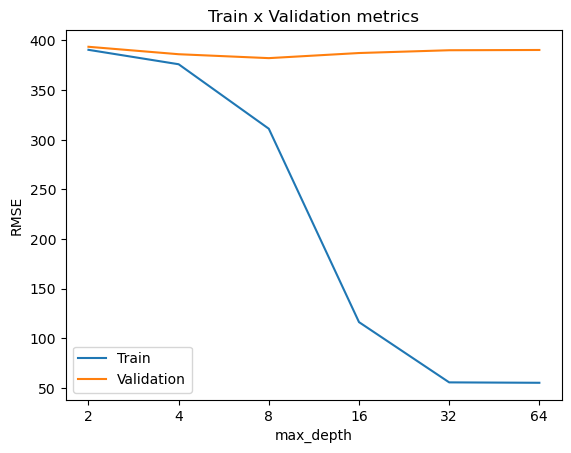

In [238]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestRegressor(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
    predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test_scaled) ## The predicted values for the test dataset
    accuracy_train = mean_squared_error(predictions_train,y_train)
    accuracy_val = mean_squared_error(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

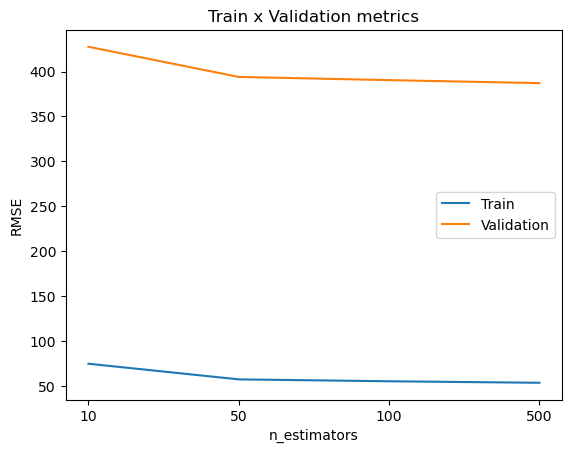

In [239]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestRegressor(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
    predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test_scaled) ## The predicted values for the test dataset
    accuracy_train = mean_squared_error(predictions_train,y_train)
    accuracy_val = mean_squared_error(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])


# Code non-optional Assignment stops here

## Choose best hyperparameters

In [240]:
random_forest_model = RandomForestRegressor(n_estimators = 100,
                                             max_depth = 4, 
                                             min_samples_split = 1000).fit(X_train_scaled,y_train)

In [241]:
print(f"Metrics train:\n\tAccuracy score: {np.sqrt(mean_squared_error(random_forest_model.predict(X_train_scaled),y_train)):.4f}\nMetrics test:\n\tAccuracy score: {np.sqrt(mean_squared_error(random_forest_model.predict(X_test_scaled),y_test)):.4f}")

Metrics train:
	Accuracy score: 19.5914
Metrics test:
	Accuracy score: 19.7258


## XGBoost

In [242]:
learning_rate_list = [0.1, 0.003, 0.001, 0.0003, 0.0001]
n_estimators_list = [10,50,100,500]

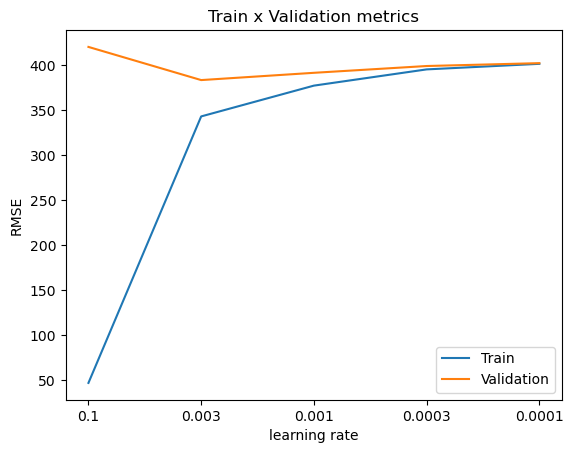

In [243]:
accuracy_list_train = []
accuracy_list_val = []
for learning_rate in learning_rate_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    xgb_model = XGBRegressor(n_estimators = 500, 
                             learning_rate = learning_rate, 
                             random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
    predictions_train = xgb_model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = xgb_model.predict(X_test_scaled) ## The predicted values for the test dataset
    accuracy_train = mean_squared_error(predictions_train,y_train)
    accuracy_val = mean_squared_error(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('learning rate')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(learning_rate_list )),labels=learning_rate_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

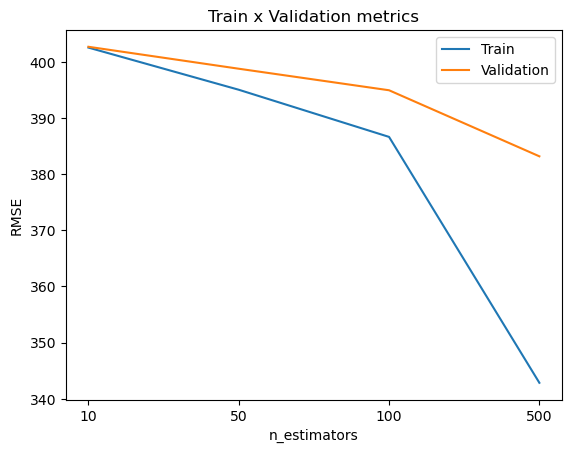

In [244]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    xgb_model = XGBRegressor(n_estimators = n_estimators, 
                             learning_rate = 0.003, 
                             random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
    predictions_train = xgb_model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = xgb_model.predict(X_test_scaled) ## The predicted values for the test dataset
    accuracy_train = mean_squared_error(predictions_train,y_train)
    accuracy_val = mean_squared_error(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [245]:
xgb_model = XGBRegressor(n_estimators = 500, learning_rate = 0.003, random_state = RANDOM_STATE)
xgb_model.fit(X_train_scaled,y_train, eval_set = [(X_test_scaled,y_test)], early_stopping_rounds = 10)

[0]	validation_0-rmse:20.09193
[1]	validation_0-rmse:20.08916
[2]	validation_0-rmse:20.08642
[3]	validation_0-rmse:20.08369
[4]	validation_0-rmse:20.08109
[5]	validation_0-rmse:20.07841
[6]	validation_0-rmse:20.07585
[7]	validation_0-rmse:20.07308
[8]	validation_0-rmse:20.07043
[9]	validation_0-rmse:20.06769
[10]	validation_0-rmse:20.06516
[11]	validation_0-rmse:20.06250
[12]	validation_0-rmse:20.05992
[13]	validation_0-rmse:20.05709
[14]	validation_0-rmse:20.05438
[15]	validation_0-rmse:20.05167
[16]	validation_0-rmse:20.04906
[17]	validation_0-rmse:20.04641
[18]	validation_0-rmse:20.04378
[19]	validation_0-rmse:20.04117
[20]	validation_0-rmse:20.03845
[21]	validation_0-rmse:20.03597
[22]	validation_0-rmse:20.03332
[23]	validation_0-rmse:20.03078
[24]	validation_0-rmse:20.02824
[25]	validation_0-rmse:20.02570
[26]	validation_0-rmse:20.02315
[27]	validation_0-rmse:20.02075
[28]	validation_0-rmse:20.01812
[29]	validation_0-rmse:20.01561
[30]	validation_0-rmse:20.01323
[31]	validation_0-

c:\Users\emile\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-rmse:19.98082
[45]	validation_0-rmse:19.97862
[46]	validation_0-rmse:19.97642
[47]	validation_0-rmse:19.97434
[48]	validation_0-rmse:19.97214
[49]	validation_0-rmse:19.97002
[50]	validation_0-rmse:19.96786
[51]	validation_0-rmse:19.96585
[52]	validation_0-rmse:19.96364
[53]	validation_0-rmse:19.96164
[54]	validation_0-rmse:19.95963
[55]	validation_0-rmse:19.95755
[56]	validation_0-rmse:19.95566
[57]	validation_0-rmse:19.95362
[58]	validation_0-rmse:19.95132
[59]	validation_0-rmse:19.94937
[60]	validation_0-rmse:19.94715
[61]	validation_0-rmse:19.94507
[62]	validation_0-rmse:19.94311
[63]	validation_0-rmse:19.94086
[64]	validation_0-rmse:19.93901
[65]	validation_0-rmse:19.93681
[66]	validation_0-rmse:19.93488
[67]	validation_0-rmse:19.93277
[68]	validation_0-rmse:19.93105
[69]	validation_0-rmse:19.92871
[70]	validation_0-rmse:19.92662
[71]	validation_0-rmse:19.92456
[72]	validation_0-rmse:19.92262
[73]	validation_0-rmse:19.92089
[74]	validation_0-rmse:19.91855
[75]	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.003, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [246]:
print(f"Metrics train:\n\tAccuracy score: {np.sqrt(mean_squared_error(xgb_model.predict(X_train_scaled),y_train)):.4f}\nMetrics test:\n\tAccuracy score: {np.sqrt(mean_squared_error(xgb_model.predict(X_test_scaled),y_test)):.4f}")

Metrics train:
	Accuracy score: 18.5159
Metrics test:
	Accuracy score: 19.5753
